In [1]:
from torch import nn
from torchvision import models

model = models.resnet18(weights="ResNet18_Weights.IMAGENET1K_V1").eval()
features = nn.Sequential(*list(model.children())[:-2])

In [ ]:
from PIL import Image
from torchvision import transforms

transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        ),
    ]
)

image = Image.open("../datasets/images/airplane.jpg")
target = transform(image).unsqueeze(0)

output = model(target)
class_idx = int(output.argmax())

weights = model.fc.weight[class_idx].reshape(-1, 1, 1)
features_output = features(target).squeeze()

# 차원을 동일하게 맞춘다.
print(weights.shape)
print(features_output.shape)

torch.Size([512, 1, 1])
torch.Size([512, 7, 7])


In [ ]:
import torch
from torch.nn import functional as F

# 클래스 맵 활성화 행렬을 계산한다. 
cam = features_output * weights             # [1, 1, 7, 7] 
cam = torch.sum(cam, dim=0)
cam = F.interpolate(
    input=cam.unsqueeze(0).unsqueeze(0),    # unsqueeze : 차원의 확장
    size=(image.size[1], image.size[0]),    # size를 
    mode="bilinear",
).squeeze().detach().numpy()                # 

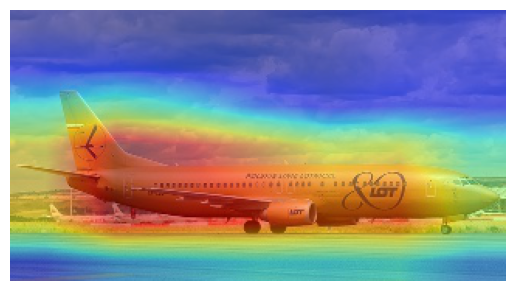

In [ ]:
import matplotlib.pyplot as plt

# 이미지 시각화
plt.imshow(image)
plt.imshow(cam, cmap="jet", alpha=0.5)
plt.axis("off")
plt.show()